In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bosonStar import *
from util import *

massInCU = 2e-77
aInCU = 1e-72
totalMassInCU = 0.1
dtInCU = 40000.0
bigT = 1000

/home/kklee/anaconda3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) 

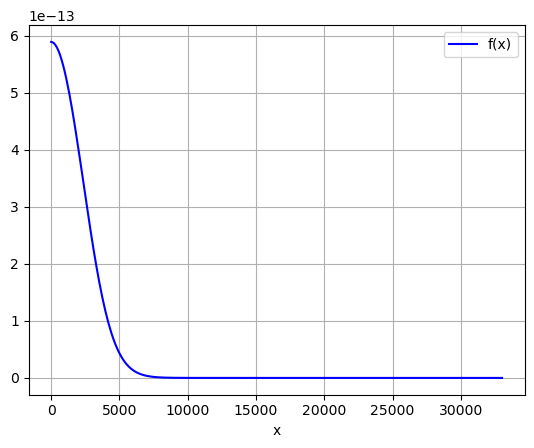

In [2]:
allThings = outputProfile(massInCU, aInCU, totalMassInCU)
#Hot Fix
x = allThings["x"][1::2]
psi = allThings["profile"][1::2]

In [3]:
totalMass = massSIToPlanckUnit(massCodeUnitToSI(totalMassInCU))
m = massSIToPlanckUnit(massCodeUnitToSI(massInCU))
a = lengthSIToPlanckUnit(lengthCodeUnitToSI(aInCU))
N = totalMass/m

In [4]:
HBAR = 1.0
G = 1.0
c = 1.0

In [5]:
Ra = np.sqrt(a/m/m/m)
omegaA = m*m/np.abs(a)
epsilon = 1.0/omegaA/m/Ra/Ra
a0 = np.sqrt(1.0/omegaA/m)
delta = 4.0*np.pi*a*N/a0
GM = totalMass/Ra/Ra/Ra/omegaA/omegaA

print("R:", Ra)
print("Omega:" ,omegaA)
print("Epsilon (Should be 1):", epsilon)
print("Delta:", delta)
print("New G:", GM)

R: 1.2233182200635002e+41
Omega: 3.656129092998464e-44
Epsilon (Should be 1): 1.0000000000000002
Delta: 46.926491232498286
New G: 3.734291520805297


In [6]:
x = lengthSIToPlanckUnit(lengthCodeUnitToSI(x))/Ra
x = np.concatenate((np.flip(-x), x))

psi = np.sqrt(densitySIToPlanckUnit(densityCodeUnitToSI(psi))/totalMass)*np.power(Ra, 3.0/2.0)
psi = np.concatenate((np.flip(psi), psi))
normalization = np.trapz(2.0*np.pi*x*x*np.absolute(psi)*np.absolute(psi), x)
psi = psi/normalization
psi = psi.astype(complex)

for index, value in enumerate(psi):
    if(value<1e-8):
        psi[index] = 0
psi = psi.astype(complex)

size = len(psi)
dt = timeSIToPlanckUnit(timeCodeUnitToSI(dtInCU))*omegaA

print(psi)
print(dt)

[0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+0

In [7]:
dx = x[1]-x[0]
T = np.zeros((size,size))
TSph = np.zeros((size,size))
V = np.zeros((size,size))
Q = np.zeros((size,size))
V2Grav = np.zeros((size,size))
I = np.identity(size)
I = I.astype(complex)

phi = -np.exp(-x*x)/1000.0
phi[0] = 0.0
phi[size-1] = 0.0

In [8]:
def setupT():
    global T, TSph
    for i in range(size):
        T[i][i] = -2.0
        if(i!=size-1):
            T[i][i+1] = 1.0
            TSph[i][i+1] = 1.0/2.0/x[i]
        if(i!=0):
            T[i][i-1] = 1.0
            TSph[i][i-1] = -1.0/2.0/x[i]

    T = -1.0/2.0/dx/dx*T
    TSph = -1.0/dx*TSph
    T = T.astype(complex)
    TSph = TSph.astype(complex)

def setupQ():
    global Q
    for i in range(size):
        if(np.absolute(psi[i]) >= 1e-8):
            Q[i][i] = delta*np.absolute(psi[i])*np.absolute(psi[i])

    Q = Q.astype(complex)

def setupV2Grav():
    global V2Grav, phi, psi

    phi[0] = 0.0
    phi[size-1] = 0.0

    temp = np.zeros((size))
    flag = False
    for i in range(size):
        if(x[i]>=0.0):
            if flag:
                temp[i] = temp[i-1] + 4.0*np.pi*x[i]*x[i]*dx*np.absolute(psi[i])*np.absolute(psi[i])
            else:
                temp[i] = temp[i-1] + 4.0/3.0*np.pi*x[i]*x[i]*x[i]*np.absolute(psi[i])*np.absolute(psi[i])
                flag = True
    
    temp = temp*GM*dx/x/x
    for i in range(size//2):
        temp[i] = temp[size-i-1]

    temp2 = np.zeros((size))
    for i in range(size-1):
        if(x[size-2-i]>=0.0):
            temp2[size-2-i] = temp2[size-1-i] - temp[size-2-i]

    for i in range(size//2):
        temp2[i] = temp2[size-i-1]

    phi = temp2

    VGrav = np.zeros((size,size))
    VGrav2 = np.zeros((size))
    for i in range(size):
        if(i!=size-1 and i!=0):
            VGrav[i][i+1] = 1.0/2.0 + 1.0/2.0*dx/x[i]
            VGrav[i][i-1] = 1.0/2.0 - 1.0/2.0*dx/x[i]
        if(np.absolute(psi[i]) >= 1e-8):
            VGrav2[i] = 2.0*np.pi*dx*dx*np.absolute(psi[i])*np.absolute(psi[i])*GM

    toler = 1e-8
    count = 0

    while(True):
        phiNew = np.dot(VGrav, phi) - VGrav2
        error = np.abs((phiNew-phi)/phi)
        phi = phiNew
        count = count + 1
        if(np.nanmax(error[error!=np.inf])<toler):
            print(count)
            break

    for i in range(size//2):
        if(np.absolute(psi[i]) >= 1e-8):
            V2Grav[i][i] = phi[size-i-1]
            V2Grav[size-i-1][size-i-1] = phi[size-i-1]
        #Regulate
        phi[i] = phi[size-i-1]

    V2Grav.astype(complex)

def setupU1U2():
    global U1, U2
    U1 = I + 1.0j*dt/2.0/HBAR*(T+TSph+Q+V2Grav)
    U2 = I - 1.0j*dt/2.0/HBAR*(T+TSph+Q+V2Grav)
    #U1 = I + 1.0j*dt/2.0*(T+TSph+V2Grav)
    #U2 = I - 1.0j*dt/2.0*(T+TSph+V2Grav)

In [9]:
setupT()

0 0.0 0.11883956296507646


/tmp/ipykernel_376871/1421278034.py:69: RuntimeWarning: invalid value encountered in divide
  error = np.abs((phiNew-phi)/phi)


169933
1 0.1336164342065364 0.11897891432223319
169965
2 0.2672328684130728 0.11939522924161912
170061
3 0.4008493026196092 0.12008219379167462
170218
4 0.5344657368261456 0.12102761494106581
170431
5 0.6680821710326821 0.12221348012742812
170695
6 0.8016986052392184 0.12361652530353197
171001
7 0.9353150394457548 0.12520951526327018
171342
8 1.0689314736522912 0.12696304901228822
171707
9 1.2025479078588277 0.12884750675182546
172089
10 1.3361643420653642 0.13083481268260028
172479
11 1.4697807762719004 0.132717879222504
172834
12 1.6033972104784369 0.13426623156553286
173107
13 1.7370136446849733 0.13545896176332567
173298
14 1.8706300788915096 0.13630587654231066
173411
15 2.004246513098046 0.13684180955230976
173459
16 2.1378629473045825 0.13711659894508696
173453
17 2.271479381511119 0.13718463313237186
173408
18 2.4050958157176554 0.13709707207732555
173335
19 2.538712249924192 0.13689774956438358
173245
20 2.6723286841307283 0.13662171480949842
173145
21 2.8059451183372643 0.136

/tmp/ipykernel_376871/1421278034.py:69: RuntimeWarning: divide by zero encountered in divide
  error = np.abs((phiNew-phi)/phi)


172457
28 3.741260157783019 0.13364042876574134
172372
29 3.8748765919895556 0.1332567003076945
172291
30 4.008493026196092 0.13289352080149713
172217
31 4.1421094604026285 0.13255840816340486
172153
32 4.275725894609165 0.1322187361755996
172089
33 4.409342328815701 0.13184096568400797
172018
34 4.542958763022238 0.13145084467222526
171945
35 4.676575197228774 0.1310988930234367
171884
36 4.810191631435311 0.13077243300034294
171830
37 4.943808065641847 0.1304201294282178
171771
38 5.077424499848384 0.130052963755178
171710
39 5.21104093405492 0.12971606154236764
171658
40 5.344657368261457 0.12938505935547495
171608
41 5.478273802467992 0.12901695808125663
171550
42 5.611890236674529 0.12864687824900808
171492
43 5.745506670881065 0.12830274916790851
171441
44 5.879123105087602 0.1279356725404837
171386
45 6.012739539294138 0.12754176418438315
171325
46 6.1463559735006745 0.12717390044705895
171271
47 6.279972407707211 0.12680426026145977
171216
48 6.4135888419137475 0.12639767638456

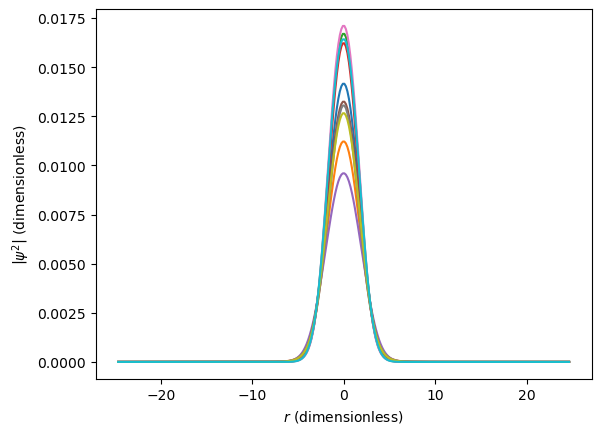

In [10]:
setupU1U2()
hello = []
ts = []
oldGM = GM
newGM = GM*1.4
for t in range(bigT):
    #Pertubation
    if(t==0):
        GM = newGM
    if(t==10):
        GM = oldGM

    print(t, t*dt, np.absolute(psi[size//2]))
    if(GM == oldGM):
        hello.append(np.absolute(psi[size//2])*np.absolute(psi[size//2]))
        ts.append(t*dt)

    setupQ()
    setupV2Grav()
    setupU1U2()
    psi = np.linalg.solve(U2, np.dot(U1,psi))

    #Regulate
    for i in range(size//2):
        psi[i] = psi[size-i-1]

    V2Grav.astype(complex)

    if t%100 == 0:
        plt.plot(x, np.absolute(psi)*np.absolute(psi))

plt.xlabel(r"$r$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

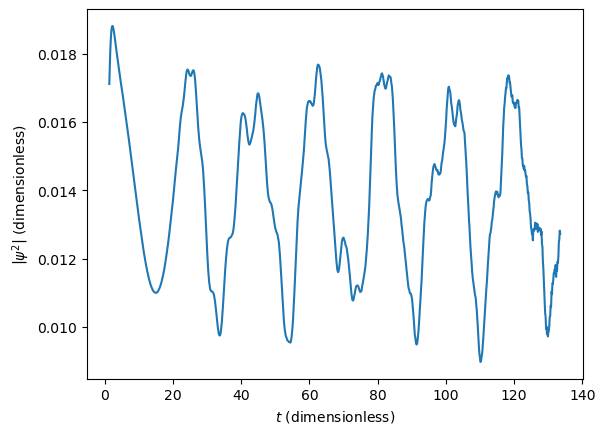

In [11]:
plt.plot(ts, hello)
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

Text(0.5, 0, 'f (1/s)')

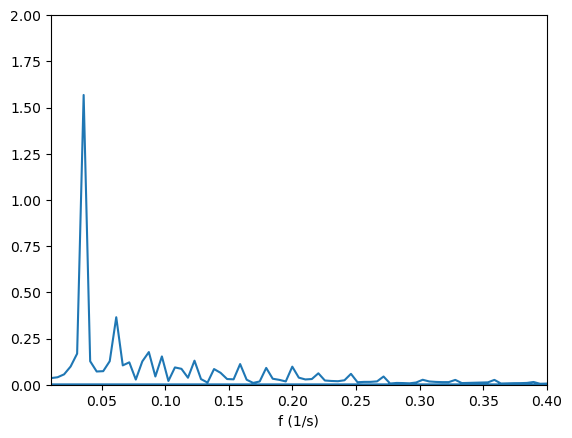

In [12]:
sp = np.fft.fft(hello)
freq = np.fft.fftfreq(len(hello), d=dt)*omegaA/5.391247e-44

plt.plot(freq, np.absolute(sp))
plt.xlim(0.01,0.4)
plt.ylim(0.0,2.0)
plt.xlabel("f (1/s)")

In [13]:
for i in range(len(freq)):
    print(freq[i], np.absolute(sp[i]))

0.0 13.704921620845957
0.005126691919191919 0.02899227148865504
0.010253383838383838 0.03578484698025372
0.015380075757575757 0.04037345806221037
0.020506767676767675 0.056098954247628244
0.02563345959595959 0.09840320199926703
0.030760151515151515 0.16830472819158357
0.03588684343434343 1.5678336939517907
0.04101353535353535 0.12713277934497022
0.04614022727272726 0.07155570907213141
0.05126691919191918 0.07334788198994155
0.05639361111111111 0.12723918664518907
0.06152030303030303 0.3651467189909141
0.06664699494949494 0.10460963340280044
0.07177368686868686 0.12115594309193327
0.07690037878787878 0.027988643741549253
0.0820270707070707 0.12637967659338467
0.08715376262626261 0.17668559738467454
0.09228045454545453 0.04456265816194865
0.09740714646464645 0.15309585693531233
0.10253383838383837 0.020401758313743315
0.1076605303030303 0.093569806908988
0.11278722222222222 0.08602998250502389
0.11791391414141414 0.03779503748489233
0.12304060606060606 0.1301188562993285
0.12816729797979

Middle
0.071-0.081			M1 (M2: 0.142-0.162, M3: 0.213-0.243, M4: 0.284-0.324, M5: 0.355-0.405)
0.132-0.137			M1?
0.158-0.163			M2
0.193-0.204			M1?
0.239-0.249			M3
0.295-0.305			M4
0.361-0.371			M5

0.076-0.086			M1
0.132-0.142			M1?
0.158-0.168			M2

Small
0.097-0.107		M1
0.163-0.173		M1?
0.214-0.224		M2
0.270-0.280		M1?
0.341-0.351		M3
0.432-0.443		M4
0.534-0.544		M5
0.651-0.661		M6

Heavy
0.031-0.037		M1
0.058-0.065		M2
0.072-0.078		M?
0.082-0.089		M?
0.099-0.167 	M3
0.116-0.123		M4
0.140-0.147		M5
0.167-0.173		M6?
0.194-0.201 	M7?